<a href="https://colab.research.google.com/github/2303a51083/Saikapil/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.

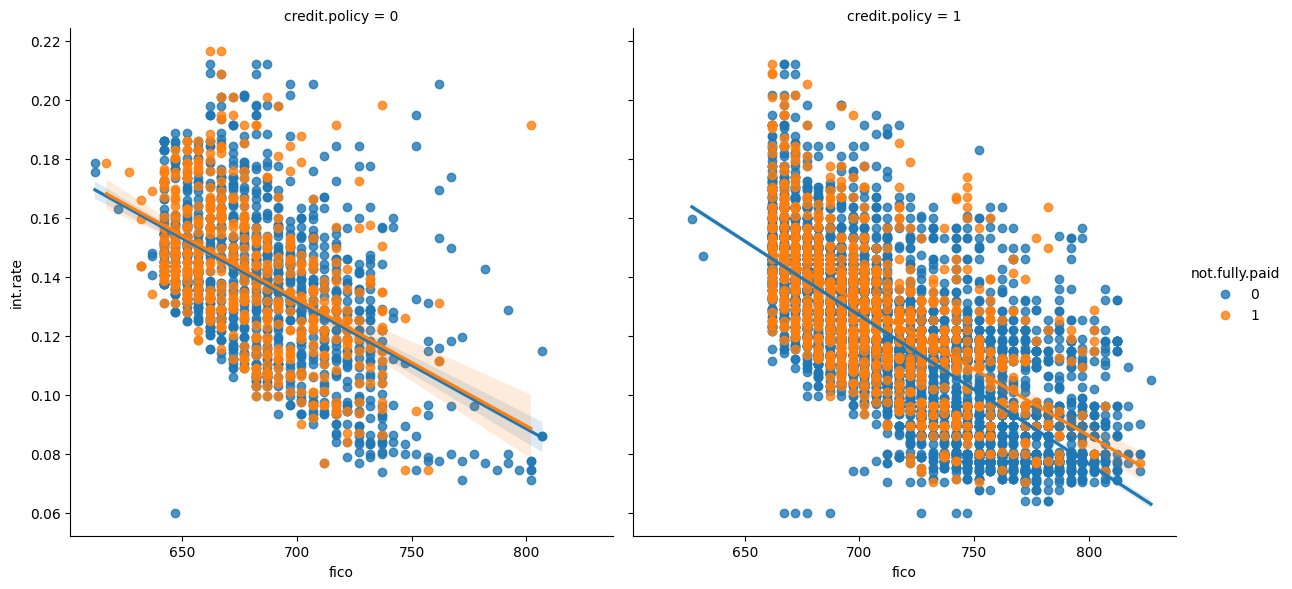

Confusion Matrix:
[[2394   14]
 [ 455   11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.44      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.78      0.84      0.77      2874



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

data = pd.read_csv('loan_data.csv')

print(data.dtypes)

print(data.describe(percentiles=[.25, .5, .75, .9]))

print(data.columns)

print(data['credit.policy'].value_counts())
sns.lmplot(x='fico', y='int.rate', hue='not.fully.paid', col='credit.policy', data=data, height=6)
plt.show()

data = pd.get_dummies(data, columns=['purpose'], drop_first=True)

X = data.drop('not.fully.paid', axis=1)
Y = data['not.fully.paid']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

predictions = rfc.predict(X_test)

cm = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(cm)

cr = classification_report(Y_test, predictions)
print("Classification Report:")
print(cr)